In [11]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

In [12]:
ds_era = xr.open_dataset('era5_monthly_surface_fluxes.nc')
ds_era

<xarray.Dataset>
Dimensions:     (latitude: 721, longitude: 1440, valid_time: 360)
Coordinates:
    number      int64 ...
  * valid_time  (valid_time) datetime64[ns] 1980-01-01T06:00:00 ... 2009-12-0...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) object ...
Data variables:
    sshf        (valid_time, latitude, longitude) float32 ...
    slhf        (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

<ipython-input-16-cbc81f99a8e5>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = plt.pcolormesh(lon_era5,lat_era5,field)


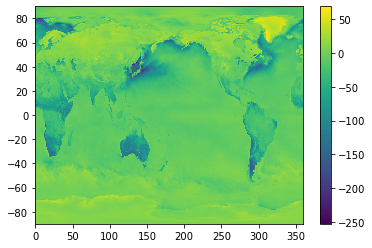

In [16]:
field = ds_era['sshf'][0].values/(24*60*60)

lon_era5 = ds_era['longitude']
lat_era5 = ds_era['latitude']

pc = plt.pcolormesh(lon_era5,lat_era5,field)
plt.colorbar(pc)


In [3]:
# This cell has to be done first and needs to be run once only.

# Download ERA5 turbulent fluxes
import cdsapi

dataset = "reanalysis-era5-single-levels-monthly-means"
request = {
    "product_type": ["monthly_averaged_reanalysis"],
    "year": ["1980", "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989",
             "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999",
             "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009",
            ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "time": ["00:00"],
    "data_format": "netcdf",
    "download_format": "unarchived",
    "variable": [
        "surface_latent_heat_flux",
        "surface_sensible_heat_flux"
    ]
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()

# I download the file and then move it to ~/Desktop/SPEEDY/era5_monthly_surface_fluxes.nc

2024-12-03 16:17:21,314 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-12-03 16:17:21,316 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2024-12-03 16:17:21,318 INFO [2024-09-16T00:00:00] Remember that you need to have an ECMWF account to use the new CDS. **Your old CDS credentials will not work in new CDS!**
2024-12-03 16:17:21,319 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using t

d8ae54f32634a0471cef003e652412f2.nc:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

'd8ae54f32634a0471cef003e652412f2.nc'